**Case Study on Regression**


Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Dataset

In [2]:
data=pd.read_csv('/content/car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


Checking the null values

In [4]:
data.isna().sum()

Year     0
Price    0
dtype: int64

Descriptive Statistics

In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
data.columns

Index(['Year', 'Price'], dtype='object')

Correlation Matrix

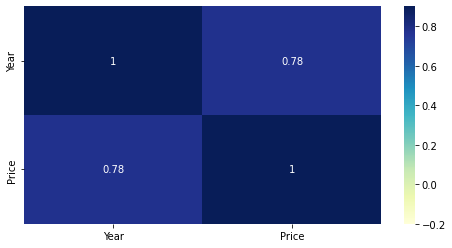

In [7]:
corrmatrix=data.corr()
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix,vmin=-0.2,vmax=0.9,annot=True,cmap='YlGnBu')

In [8]:
data.dtypes

Year     int64
Price    int64
dtype: object

Linear Regression

In [9]:
X=data.drop('Price',axis=1)
Y=data['Price']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()
model1=lr.fit(X_train,Y_train)
predictions=model1.predict(X_test)

In [13]:
print(predictions)

[600775.91252081 505558.77690466 553167.34471273 553167.34471273
 553167.34471273 410341.6412885  505558.77690466 553167.34471273
 600775.91252081 600775.91252081 315124.50567235 505558.77690466
 410341.6412885  648384.48032889 553167.34471273 600775.91252081
 315124.50567235 410341.6412885  505558.77690466 505558.77690466
 505558.77690466 505558.77690466 505558.77690466]


In [14]:
from sklearn.metrics import mean_squared_error,r2_score

In [15]:
print('MSE is:',mean_squared_error(Y_test,predictions))
print('R squared value is:',r2_score(Y_test,predictions))

MSE is: 4326906256.829671
R squared value is: 0.36759313425902185


Lasso Regression

In [16]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

In [17]:
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(X_train, Y_train)
Y_pred1 = lasso.predict(X_test)

In [19]:
Y_pred1

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [18]:
# Calculate Mean Squared Error
mean_squared_error = np.mean((Y_pred1 - Y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

Mean squared error on test set 4326859771.015669
  Columns  Coefficient Estimate
0    Year            47608.1556


In [20]:
print('R squared value is:',r2_score(Y_test,Y_pred1))

R squared value is: 0.3675999284778446


Regression model with R squared value close to 1 will be considered as the good model. Here, Lasso regression has greater R squared value.And the mean squared error should as low as possible. Because in Machine learning the main goal is decrease the error. Here Lasso regression has lowest mean squared error. Hence **Lasso regression** would predict better than Linear Regression model.



